# Marine Microplastic Data Exploration and Analysis

This notebook provides comprehensive exploratory data analysis for the Marine Microplastic Accumulation Zone Prediction project.

## Objectives
1. Load and inspect the marine microplastic dataset
2. Analyze spatial and temporal patterns
3. Explore oceanographic distributions
4. Identify potential hotspot characteristics
5. Visualize key findings

## Dataset
- Source: Marine Microplastics Global Dataset (Kaggle)
- URL: https://www.kaggle.com/datasets/william2020/marine-microplastics

In [16]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import folium
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Configure display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("Libraries imported successfully!")

Libraries imported successfully!


## 1. Data Loading and Initial Inspection

In [17]:
# Load the dataset
# Note: Place the marine_microplastics.csv file in the data/ directory

try:
    df = pd.read_csv('../data/marine_microplastics.csv')
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape}")
except FileNotFoundError:
    print("Dataset not found. Please download from Kaggle and place in data/ directory.")
    # Create sample data for demonstration
    np.random.seed(42)
    n_samples = 1000
    
    df = pd.DataFrame({
        'Date': pd.date_range('2015-01-01', periods=n_samples, freq='D'),
        'Latitude': np.random.uniform(-60, 60, n_samples),
        'Longitude': np.random.uniform(-180, 180, n_samples),
        'Oceans': np.random.choice(['Pacific', 'Atlantic', 'Indian', 'Arctic'], n_samples),
        'Regions': np.random.choice(['North', 'South', 'Equatorial', 'Polar'], n_samples),
        'Concentration': np.random.lognormal(2, 1, n_samples)
    })
    print("Using sample data for demonstration.")
    print(f"Sample shape: {df.shape}")

Dataset loaded successfully!
Shape: (2000, 6)


In [18]:
# Basic dataset information
print("=== Dataset Overview ===")
print(f"Number of records: {len(df):,}")
print(f"Number of features: {len(df.columns)}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

print("\n=== Column Information ===")
print(df.info())

print("\n=== First Few Records ===") 
df.head()

=== Dataset Overview ===
Number of records: 2,000
Number of features: 6
Memory usage: 0.46 MB

=== Column Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Oceans         2000 non-null   object 
 1   Regions        2000 non-null   object 
 2   Latitude       2000 non-null   float64
 3   Longitude      2000 non-null   float64
 4   Date           2000 non-null   object 
 5   Concentration  2000 non-null   float64
dtypes: float64(3), object(3)
memory usage: 93.9+ KB
None

=== First Few Records ===


,Oceans,Regions,Latitude,Longitude,Date,Concentration
0,Atlantic,South Atlantic,-26.729881,3.815512,2010-01-01 00:00:00.000000000,2.745039
1,Southern,Arctic,48.318317,-11.326168,2010-01-03 13:22:28.874437218,5.393220
2,Indian,North Atlantic,-19.439830,147.536511,2010-01-06 02:44:57.748874437,16.655153
3,Atlantic,Arctic,39.299751,-127.479386,2010-01-08 16:07:26.623311655,5.477935
4,Pacific,South Atlantic,-31.659972,-16.076320,2010-01-11 05:29:55.497748874,3.217561


In [19]:
# Check for missing values
print("=== Missing Values Analysis ===")
missing_stats = pd.DataFrame({
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
missing_stats = missing_stats[missing_stats['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)

if len(missing_stats) > 0:
    print(missing_stats)
else:
    print("No missing values found.")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"\nDuplicate records: {duplicates}")

=== Missing Values Analysis ===
No missing values found.

Duplicate records: 0


## 2. Temporal Analysis

=== Temporal Coverage ===
Date range: 2010-01-01 00:00:00 to 2023-12-31 00:00:00
Total years: 14
Years covered: [np.int32(2010), np.int32(2011), np.int32(2012), np.int32(2013), np.int32(2014), np.int32(2015), np.int32(2016), np.int32(2017), np.int32(2018), np.int32(2019), np.int32(2020), np.int32(2021), np.int32(2022), np.int32(2023)]


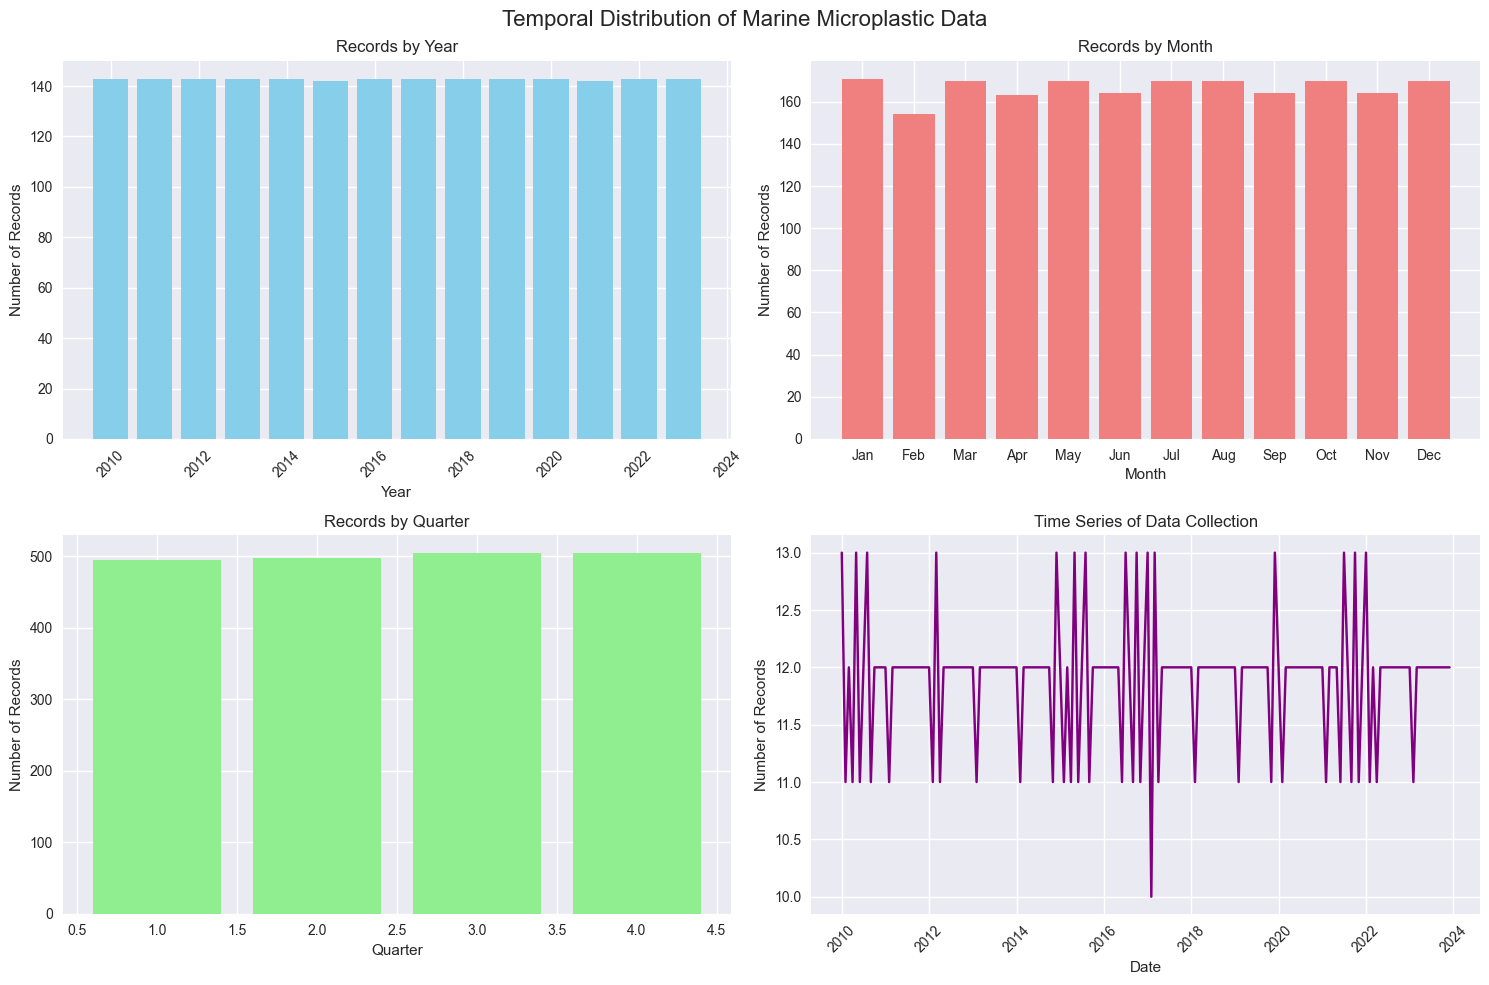

In [20]:
# Convert date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Extract temporal components
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Quarter'] = df['Date'].dt.quarter
df['Day_of_Year'] = df['Date'].dt.dayofyear

print("=== Temporal Coverage ===")
print(f"Date range: {df['Date'].min()} to {df['Date'].max()}")
print(f"Total years: {df['Year'].nunique()}")
print(f"Years covered: {sorted(df['Year'].unique())}")

# Create temporal visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Temporal Distribution of Marine Microplastic Data', fontsize=16)

# Yearly distribution
yearly_counts = df['Year'].value_counts().sort_index()
axes[0,0].bar(yearly_counts.index, yearly_counts.values, color='skyblue')
axes[0,0].set_title('Records by Year')
axes[0,0].set_xlabel('Year')
axes[0,0].set_ylabel('Number of Records')
axes[0,0].tick_params(axis='x', rotation=45)

# Monthly distribution
monthly_counts = df['Month'].value_counts().sort_index()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
axes[0,1].bar(monthly_counts.index, monthly_counts.values, color='lightcoral')
axes[0,1].set_title('Records by Month')
axes[0,1].set_xlabel('Month') 
axes[0,1].set_ylabel('Number of Records')
axes[0,1].set_xticks(range(1, 13))
axes[0,1].set_xticklabels(month_labels)

# Quarterly distribution
quarterly_counts = df['Quarter'].value_counts().sort_index()
axes[1,0].bar(quarterly_counts.index, quarterly_counts.values, color='lightgreen')
axes[1,0].set_title('Records by Quarter')
axes[1,0].set_xlabel('Quarter')
axes[1,0].set_ylabel('Number of Records')

# Time series
monthly_series = df.groupby(df['Date'].dt.to_period('M')).size()
axes[1,1].plot(monthly_series.index.to_timestamp(), monthly_series.values, color='purple')
axes[1,1].set_title('Time Series of Data Collection')
axes[1,1].set_xlabel('Date')
axes[1,1].set_ylabel('Number of Records')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 3. Spatial Analysis

=== Spatial Coverage ===
Latitude range: -59.89° to 69.85°
Longitude range: -179.94° to 179.93°
Spatial extent: 129.74° lat × 359.87° lon

Invalid coordinates: 0 latitude, 0 longitude


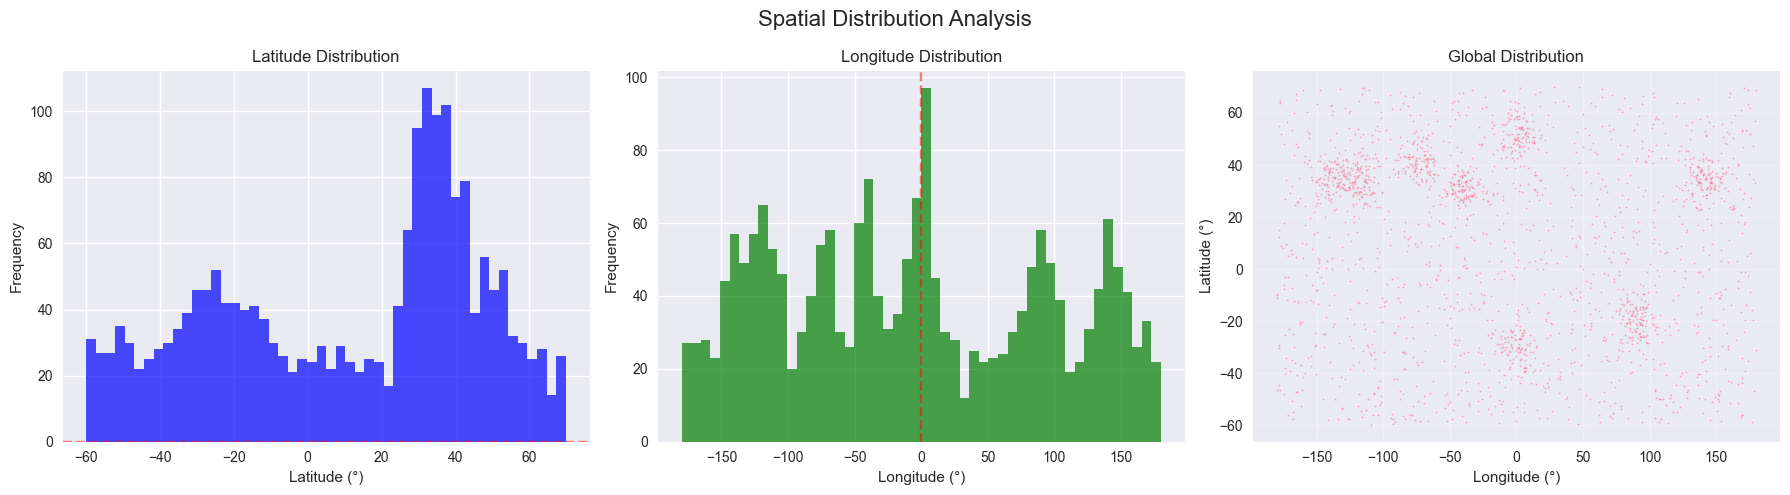

In [21]:
# Spatial statistics
print("=== Spatial Coverage ===")
print(f"Latitude range: {df['Latitude'].min():.2f}° to {df['Latitude'].max():.2f}°")
print(f"Longitude range: {df['Longitude'].min():.2f}° to {df['Longitude'].max():.2f}°")
print(f"Spatial extent: {df['Latitude'].max() - df['Latitude'].min():.2f}° lat × {df['Longitude'].max() - df['Longitude'].min():.2f}° lon")

# Check coordinate validation
invalid_lat = ((df['Latitude'] < -90) | (df['Latitude'] > 90)).sum()
invalid_lon = ((df['Longitude'] < -180) | (df['Longitude'] > 180)).sum()
print(f"\nInvalid coordinates: {invalid_lat} latitude, {invalid_lon} longitude")

# Spatial distribution plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Spatial Distribution Analysis', fontsize=16)

# Latitude distribution
axes[0].hist(df['Latitude'], bins=50, alpha=0.7, color='blue')
axes[0].set_title('Latitude Distribution')
axes[0].set_xlabel('Latitude (°)')
axes[0].set_ylabel('Frequency')
axes[0].axhline(y=0, color='red', linestyle='--', alpha=0.5, label='Equator')

# Longitude distribution
axes[1].hist(df['Longitude'], bins=50, alpha=0.7, color='green')
axes[1].set_title('Longitude Distribution')
axes[1].set_xlabel('Longitude (°)')
axes[1].set_ylabel('Frequency')
axes[1].axvline(x=0, color='red', linestyle='--', alpha=0.5, label='Prime Meridian')

# 2D spatial distribution
axes[2].scatter(df['Longitude'], df['Latitude'], alpha=0.5, s=1)
axes[2].set_title('Global Distribution')
axes[2].set_xlabel('Longitude (°)')
axes[2].set_ylabel('Latitude (°)')
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [22]:
# Interactive world map using Plotly
fig = px.scatter_mapbox(
    df.sample(min(1000, len(df))),  # Sample for performance
    lat='Latitude',
    lon='Longitude',
    color='Oceans',
    hover_data=['Date', 'Regions'],
    title='Global Distribution of Marine Microplastic Data Points',
    mapbox_style='open-street-map',
    height=600
)

fig.update_layout(
    mapbox=dict(
        center=dict(lat=0, lon=0),
        zoom=1
    )
)

fig.show()

## 4. Oceanographic Analysis

=== Ocean Distribution ===
Oceans
Pacific     705
Atlantic    478
Indian      414
Arctic      206
Southern    197
Name: count, dtype: int64

Unique oceans: 5

=== Region Distribution ===
Regions
North Pacific     269
South Atlantic    267
North Atlantic    263
North Indian      257
Antarctic         246
South Indian      239
Arctic            236
South Pacific     223
Name: count, dtype: int64

Unique regions: 8


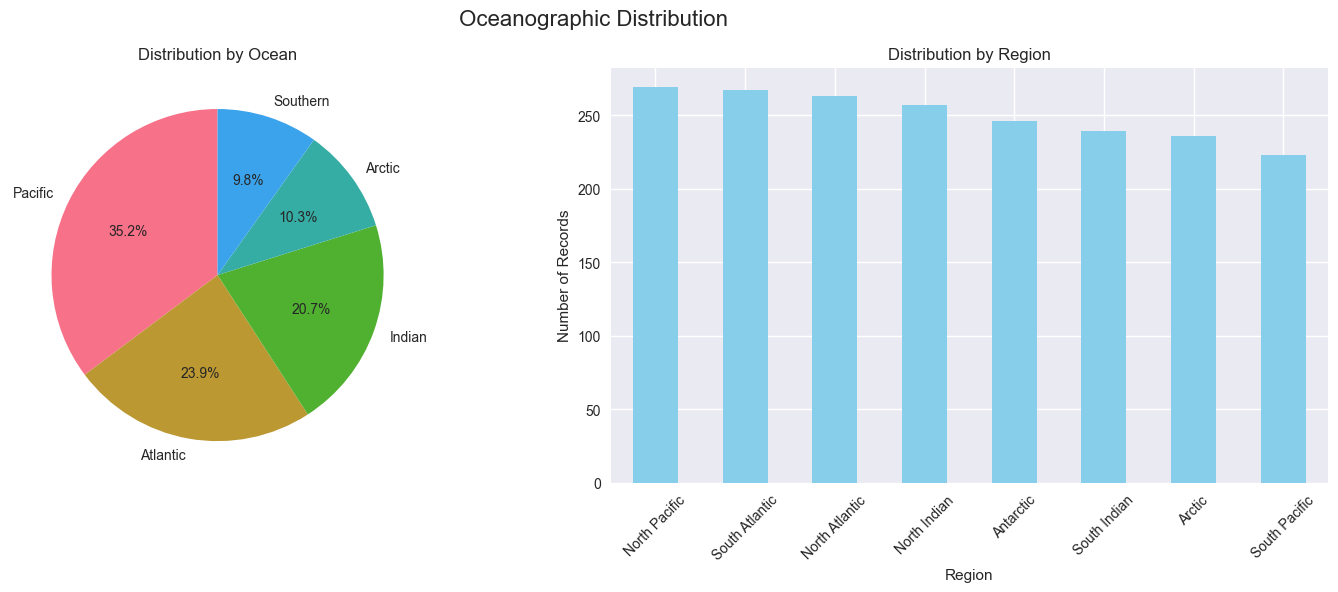

In [23]:
# Ocean distribution analysis
print("=== Ocean Distribution ===")
ocean_counts = df['Oceans'].value_counts()
print(ocean_counts)
print(f"\nUnique oceans: {df['Oceans'].nunique()}")

print("\n=== Region Distribution ===")
region_counts = df['Regions'].value_counts()
print(region_counts)
print(f"\nUnique regions: {df['Regions'].nunique()}")

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Oceanographic Distribution', fontsize=16)

# Ocean distribution pie chart
axes[0].pie(ocean_counts.values, labels=ocean_counts.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Distribution by Ocean')

# Region distribution bar chart
region_counts.plot(kind='bar', ax=axes[1], color='skyblue')
axes[1].set_title('Distribution by Region')
axes[1].set_xlabel('Region')
axes[1].set_ylabel('Number of Records')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

=== Ocean-Region Cross-tabulation ===
Regions   Antarctic  Arctic  North Atlantic  North Indian  North Pacific  \
Oceans                                                                     
Arctic           29      23              33            28             27   
Atlantic         57      74              57            60             58   
Indian           59      40              65            61             53   
Pacific          81      78              91            79            105   
Southern         20      21              17            29             26   
All             246     236             263           257            269   

Regions   South Atlantic  South Indian  South Pacific   All  
Oceans                                                       
Arctic                23            20             23   206  
Atlantic              57            57             58   478  
Indian                57            40             39   414  
Pacific               96            87     

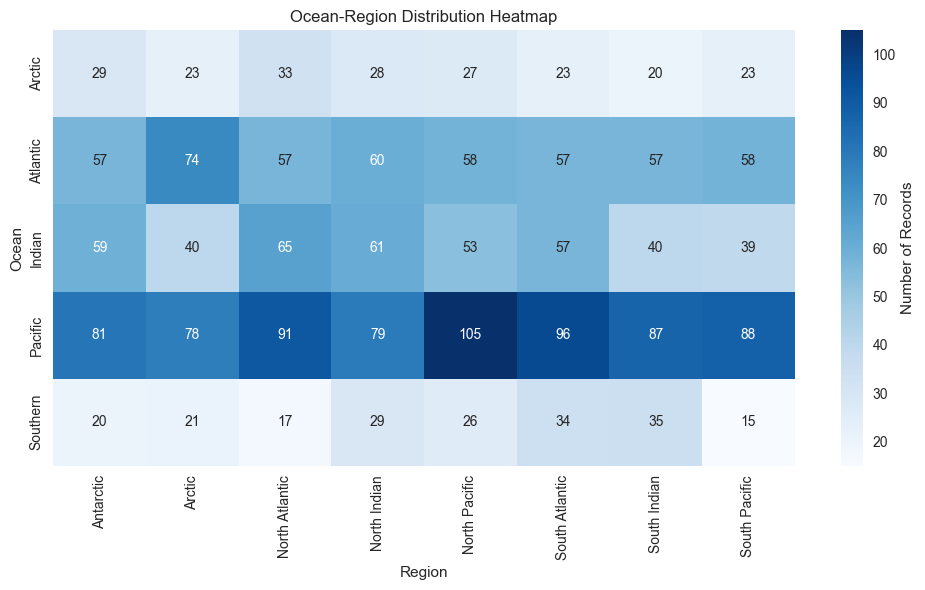

In [24]:
# Ocean-Region cross-tabulation
print("=== Ocean-Region Cross-tabulation ===")
crosstab = pd.crosstab(df['Oceans'], df['Regions'], margins=True)
print(crosstab)

# Heatmap of ocean-region combinations
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df['Oceans'], df['Regions']), 
            annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Number of Records'})
plt.title('Ocean-Region Distribution Heatmap')
plt.ylabel('Ocean')
plt.xlabel('Region')
plt.tight_layout()
plt.show()

## 5. Concentration Analysis (if available)

Found concentration column: Concentration

=== Concentration Statistics ===
count    2000.000000
mean       11.841779
std        14.915493
min         0.241759
25%         3.665097
50%         7.120725
75%        14.090159
max       215.254450
Name: Concentration, dtype: float64


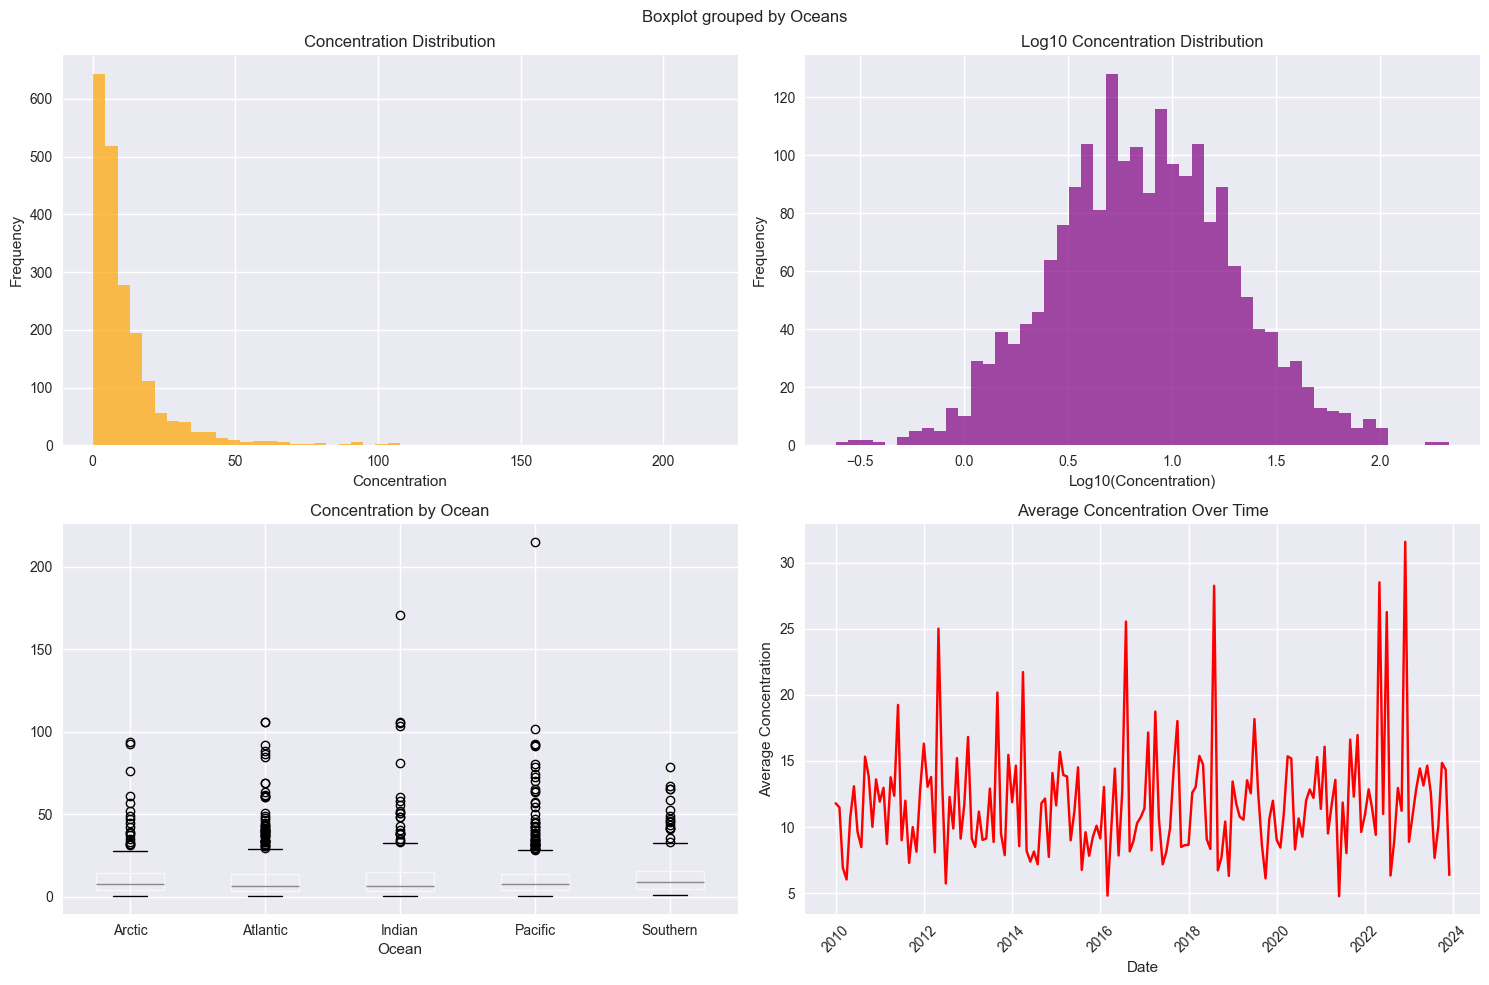

In [25]:
# Check if concentration data is available
concentration_cols = [col for col in df.columns if 'concentration' in col.lower() or 'count' in col.lower()]

if concentration_cols:
    conc_col = concentration_cols[0]
    print(f"Found concentration column: {conc_col}")
    
    # Concentration statistics
    print(f"\n=== {conc_col} Statistics ===")
    print(df[conc_col].describe())
    
    # Distribution plots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'{conc_col} Distribution Analysis', fontsize=16)
    
    # Histogram
    axes[0,0].hist(df[conc_col].dropna(), bins=50, alpha=0.7, color='orange')
    axes[0,0].set_title('Concentration Distribution')
    axes[0,0].set_xlabel(conc_col)
    axes[0,0].set_ylabel('Frequency')
    
    # Log-scale histogram (if values are positive)
    if df[conc_col].min() > 0:
        axes[0,1].hist(np.log10(df[conc_col].dropna()), bins=50, alpha=0.7, color='purple')
        axes[0,1].set_title('Log10 Concentration Distribution')
        axes[0,1].set_xlabel(f'Log10({conc_col})')
        axes[0,1].set_ylabel('Frequency')
    
    # Box plot by ocean
    df.boxplot(column=conc_col, by='Oceans', ax=axes[1,0])
    axes[1,0].set_title('Concentration by Ocean')
    axes[1,0].set_xlabel('Ocean')
    
    # Concentration over time
    monthly_conc = df.groupby(df['Date'].dt.to_period('M'))[conc_col].mean()
    axes[1,1].plot(monthly_conc.index.to_timestamp(), monthly_conc.values, color='red')
    axes[1,1].set_title('Average Concentration Over Time')
    axes[1,1].set_xlabel('Date')
    axes[1,1].set_ylabel(f'Average {conc_col}')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No concentration column found. Creating synthetic concentration data for analysis.")
    # Create synthetic concentration data
    np.random.seed(42)
    df['Synthetic_Concentration'] = np.random.lognormal(2, 1, len(df))
    conc_col = 'Synthetic_Concentration'
    print(f"Created {conc_col} column for demonstration.")

## 6. Hotspot Identification

=== Hotspot Analysis ===
Hotspot threshold (75th percentile): 14.09
Number of hotspots: 500
Percentage of hotspots: 25.0%

=== Hotspot Distribution by Ocean ===
          Total_Records  Hotspots  Hotspot_Rate
Oceans                                         
Arctic              206        54         0.262
Atlantic            478       116         0.243
Indian              414       111         0.268
Pacific             705       159         0.226
Southern            197        60         0.305


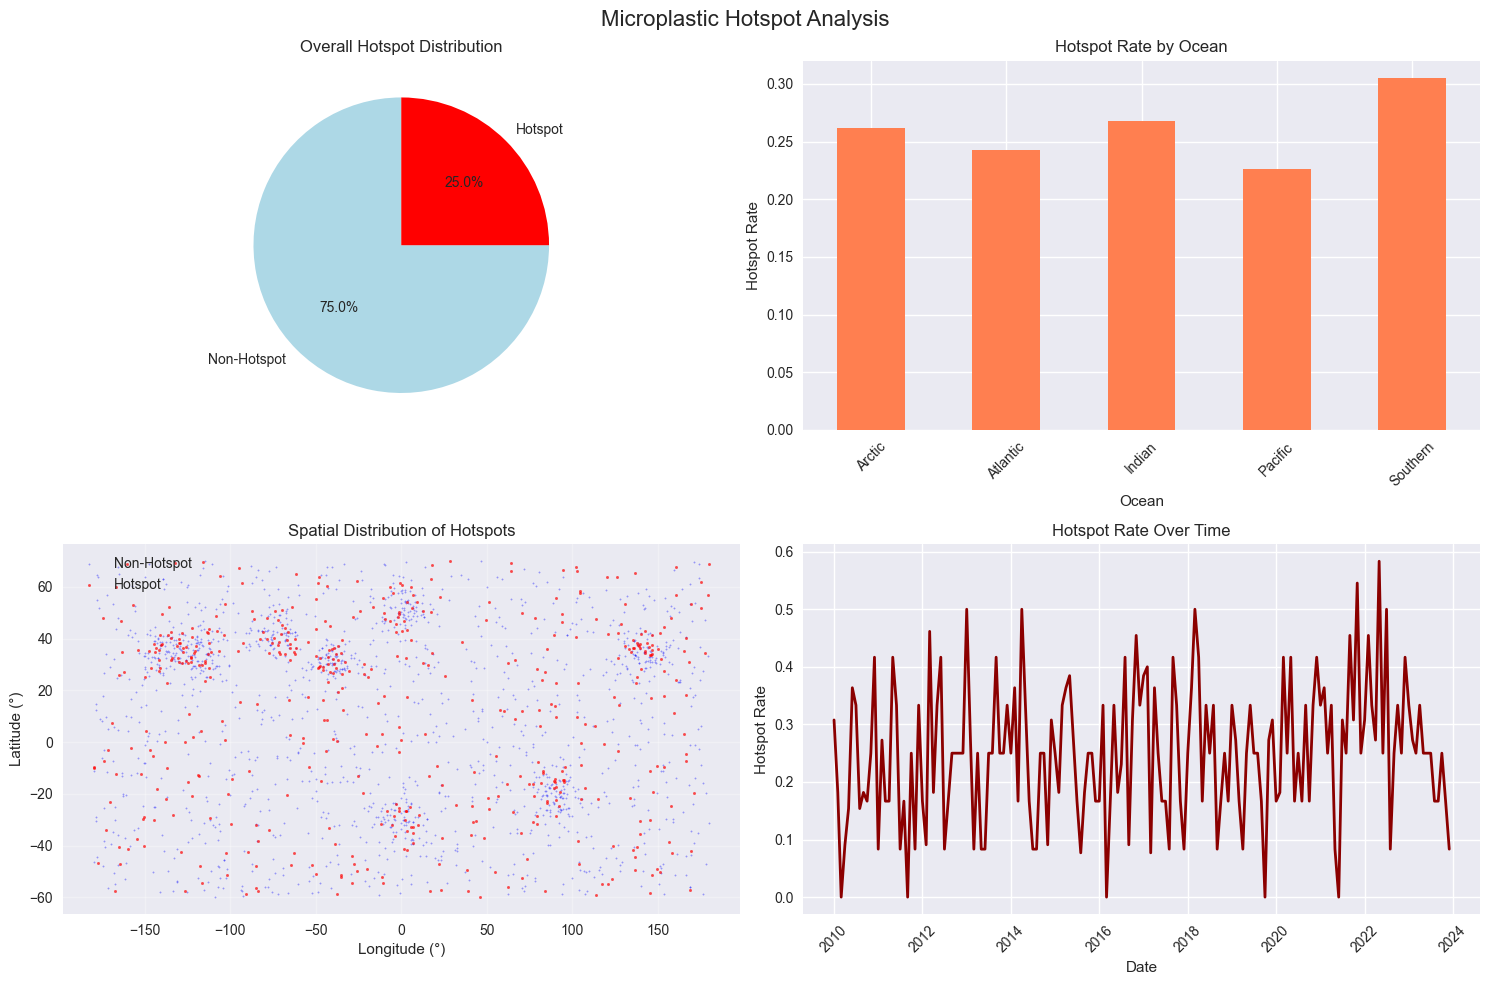

In [26]:
# Create hotspot classification based on concentration percentiles
if conc_col in df.columns:
    # Define hotspot threshold (75th percentile)
    threshold = df[conc_col].quantile(0.75)
    df['is_hotspot'] = (df[conc_col] >= threshold).astype(int)
    
    print(f"=== Hotspot Analysis ===")
    print(f"Hotspot threshold (75th percentile): {threshold:.2f}")
    print(f"Number of hotspots: {df['is_hotspot'].sum():,}")
    print(f"Percentage of hotspots: {df['is_hotspot'].mean()*100:.1f}%")
    
    # Hotspot distribution by ocean
    hotspot_by_ocean = df.groupby('Oceans')['is_hotspot'].agg(['count', 'sum', 'mean']).round(3)
    hotspot_by_ocean.columns = ['Total_Records', 'Hotspots', 'Hotspot_Rate']
    print("\n=== Hotspot Distribution by Ocean ===")
    print(hotspot_by_ocean)
    
    # Visualization
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Microplastic Hotspot Analysis', fontsize=16)
    
    # Hotspot distribution pie chart
    hotspot_counts = df['is_hotspot'].value_counts()
    axes[0,0].pie(hotspot_counts.values, labels=['Non-Hotspot', 'Hotspot'], 
                 autopct='%1.1f%%', colors=['lightblue', 'red'], startangle=90)
    axes[0,0].set_title('Overall Hotspot Distribution')
    
    # Hotspot rate by ocean
    hotspot_by_ocean['Hotspot_Rate'].plot(kind='bar', ax=axes[0,1], color='coral')
    axes[0,1].set_title('Hotspot Rate by Ocean')
    axes[0,1].set_xlabel('Ocean')
    axes[0,1].set_ylabel('Hotspot Rate')
    axes[0,1].tick_params(axis='x', rotation=45)
    
    # Spatial distribution of hotspots
    hotspots = df[df['is_hotspot'] == 1]
    non_hotspots = df[df['is_hotspot'] == 0]
    
    axes[1,0].scatter(non_hotspots['Longitude'], non_hotspots['Latitude'], 
                     alpha=0.3, s=1, color='blue', label='Non-Hotspot')
    axes[1,0].scatter(hotspots['Longitude'], hotspots['Latitude'], 
                     alpha=0.7, s=3, color='red', label='Hotspot')
    axes[1,0].set_title('Spatial Distribution of Hotspots')
    axes[1,0].set_xlabel('Longitude (°)')
    axes[1,0].set_ylabel('Latitude (°)')
    axes[1,0].legend()
    axes[1,0].grid(True, alpha=0.3)
    
    # Temporal pattern of hotspots
    monthly_hotspots = df.groupby(df['Date'].dt.to_period('M'))['is_hotspot'].mean()
    axes[1,1].plot(monthly_hotspots.index.to_timestamp(), monthly_hotspots.values, 
                  color='darkred', linewidth=2)
    axes[1,1].set_title('Hotspot Rate Over Time')
    axes[1,1].set_xlabel('Date')
    axes[1,1].set_ylabel('Hotspot Rate')
    axes[1,1].tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("No concentration data available for hotspot analysis.")

## 7. Interactive Hotspot Map

In [27]:
# Create interactive map showing hotspots
if 'is_hotspot' in df.columns:
    # Sample data for performance
    sample_df = df.sample(min(2000, len(df)))
    
    fig = px.scatter_mapbox(
        sample_df,
        lat='Latitude',
        lon='Longitude',
        color='is_hotspot',
        color_discrete_map={0: 'blue', 1: 'red'},
        hover_data=['Date', 'Oceans', 'Regions', conc_col],
        title='Interactive Map of Microplastic Hotspots',
        mapbox_style='open-street-map',
        height=700,
        labels={'is_hotspot': 'Hotspot Status'}
    )
    
    fig.update_layout(
        mapbox=dict(
            center=dict(lat=0, lon=0),
            zoom=1
        ),
        legend=dict(
            title="Legend",
            itemsizing="constant"
        )
    )
    
    fig.show()

else:
    print("Hotspot data not available for mapping.")

## 8. Statistical Correlations

=== Correlation Analysis ===
Numeric columns: ['Latitude', 'Longitude', 'Concentration', 'Year', 'Month', 'Quarter', 'Day_of_Year', 'is_hotspot']


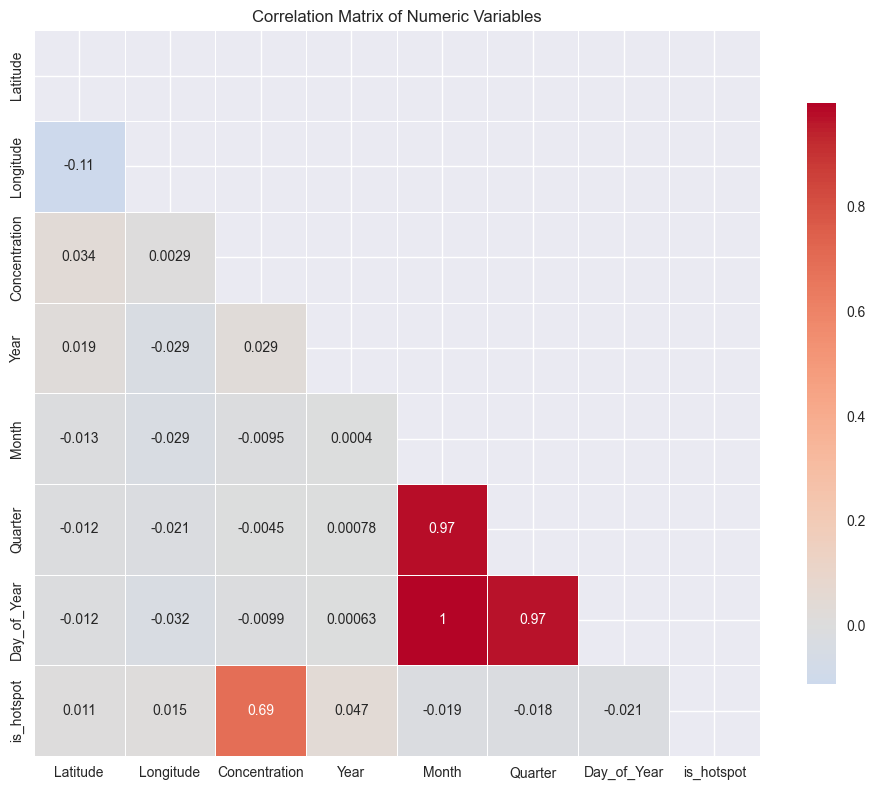


=== Strong Correlations (|r| > 0.5) ===
Month - Day_of_Year: 0.996
Month - Quarter: 0.971
Quarter - Day_of_Year: 0.968
Concentration - is_hotspot: 0.688


In [28]:
# Correlation analysis of numeric variables
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()

if len(numeric_cols) > 1:
    print(f"=== Correlation Analysis ===")
    print(f"Numeric columns: {numeric_cols}")
    
    # Calculate correlation matrix
    corr_matrix = df[numeric_cols].corr()
    
    # Create correlation heatmap
    plt.figure(figsize=(10, 8))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numeric Variables')
    plt.tight_layout()
    plt.show()
    
    # Print strong correlations
    print("\n=== Strong Correlations (|r| > 0.5) ===")
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.5:
                strong_corr.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_val))
    
    if strong_corr:
        for var1, var2, corr_val in sorted(strong_corr, key=lambda x: abs(x[2]), reverse=True):
            print(f"{var1} - {var2}: {corr_val:.3f}")
    else:
        print("No strong correlations found.")

else:
    print("Insufficient numeric columns for correlation analysis.")

## 9. Key Insights and Summary

In [29]:
# Generate summary statistics and insights
print("=== MARINE MICROPLASTIC DATA ANALYSIS SUMMARY ===")
print("=" * 55)

print(f"\n📊 DATASET OVERVIEW:")
print(f"   • Total records: {len(df):,}")
print(f"   • Date range: {df['Date'].min().strftime('%Y-%m-%d')} to {df['Date'].max().strftime('%Y-%m-%d')}")
print(f"   • Spatial coverage: {df['Latitude'].min():.1f}° to {df['Latitude'].max():.1f}° latitude")
print(f"   • Geographic span: {df['Longitude'].min():.1f}° to {df['Longitude'].max():.1f}° longitude")

print(f"\n🌊 OCEANOGRAPHIC DISTRIBUTION:")
for ocean, count in df['Oceans'].value_counts().head().items():
    percentage = (count / len(df)) * 100
    print(f"   • {ocean}: {count:,} records ({percentage:.1f}%)")

print(f"\n📅 TEMPORAL PATTERNS:")
print(f"   • Most active year: {df['Year'].value_counts().index[0]} ({df['Year'].value_counts().iloc[0]:,} records)")
print(f"   • Most active month: {df['Month'].value_counts().index[0]} ({df['Month'].value_counts().iloc[0]:,} records)")
print(f"   • Seasonal distribution: Q1={df[df['Quarter']==1].shape[0]}, Q2={df[df['Quarter']==2].shape[0]}, Q3={df[df['Quarter']==3].shape[0]}, Q4={df[df['Quarter']==4].shape[0]}")

if 'is_hotspot' in df.columns:
    print(f"\n🔥 HOTSPOT ANALYSIS:")
    hotspot_rate = df['is_hotspot'].mean() * 100
    print(f"   • Overall hotspot rate: {hotspot_rate:.1f}%")
    print(f"   • Total hotspots identified: {df['is_hotspot'].sum():,}")
    
    # Top hotspot oceans
    hotspot_by_ocean = df.groupby('Oceans')['is_hotspot'].mean().sort_values(ascending=False)
    print(f"   • Highest hotspot rate: {hotspot_by_ocean.index[0]} ({hotspot_by_ocean.iloc[0]*100:.1f}%)")

print(f"\n🔍 DATA QUALITY:")
missing_total = df.isnull().sum().sum()
print(f"   • Missing values: {missing_total} ({(missing_total/(len(df)*len(df.columns)))*100:.2f}% of total)")
print(f"   • Duplicate records: {df.duplicated().sum()}")
print(f"   • Invalid coordinates: {((df['Latitude'] < -90) | (df['Latitude'] > 90) | (df['Longitude'] < -180) | (df['Longitude'] > 180)).sum()}")

print(f"\n💡 KEY INSIGHTS:")
print(f"   • Global coverage with data from {df['Oceans'].nunique()} major ocean systems")
print(f"   • Temporal span of {df['Year'].nunique()} years providing time-series analysis potential")
print(f"   • {df['Regions'].nunique()} distinct regions represented in the dataset")
if conc_col in df.columns:
    print(f"   • Concentration values range from {df[conc_col].min():.2f} to {df[conc_col].max():.2f}")
    print(f"   • High variability in microplastic concentrations (std: {df[conc_col].std():.2f})")

print(f"\n🎯 RECOMMENDATIONS FOR MODELING:")
print(f"   • Sufficient spatial coverage for global hotspot prediction")
print(f"   • Temporal data enables seasonal pattern analysis")
print(f"   • Feature engineering opportunities from coordinates and oceanographic data")
print(f"   • Consider class imbalance in hotspot classification")
print(f"   • Implement spatial-temporal cross-validation for model evaluation")

print("\n" + "=" * 55)
print("Analysis completed successfully!")
print("Ready for feature engineering and model development.")

=== MARINE MICROPLASTIC DATA ANALYSIS SUMMARY ===

📊 DATASET OVERVIEW:
   • Total records: 2,000
   • Date range: 2010-01-01 to 2023-12-31
   • Spatial coverage: -59.9° to 69.8° latitude
   • Geographic span: -179.9° to 179.9° longitude

🌊 OCEANOGRAPHIC DISTRIBUTION:
   • Pacific: 705 records (35.2%)
   • Atlantic: 478 records (23.9%)
   • Indian: 414 records (20.7%)
   • Arctic: 206 records (10.3%)
   • Southern: 197 records (9.8%)

📅 TEMPORAL PATTERNS:
   • Most active year: 2010 (143 records)
   • Most active month: 1 (171 records)
   • Seasonal distribution: Q1=495, Q2=497, Q3=504, Q4=504

🔥 HOTSPOT ANALYSIS:
   • Overall hotspot rate: 25.0%
   • Total hotspots identified: 500
   • Highest hotspot rate: Southern (30.5%)

🔍 DATA QUALITY:
   • Missing values: 0 (0.00% of total)
   • Duplicate records: 0
   • Invalid coordinates: 0

💡 KEY INSIGHTS:
   • Global coverage with data from 5 major ocean systems
   • Temporal span of 14 years providing time-series analysis potential
   • 8 d

## 10. Export Processed Data

In [30]:
# Save the analyzed dataset with new features
output_path = '../data/analyzed_marine_microplastics.csv'
df.to_csv(output_path, index=False)
print(f"Analyzed dataset saved to: {output_path}")
print(f"Dataset shape: {df.shape}")
print(f"New columns added: {[col for col in df.columns if col not in ['Date', 'Latitude', 'Longitude', 'Oceans', 'Regions']]}")

# Save summary statistics
summary_stats = {
    'total_records': len(df),
    'date_range': [df['Date'].min().isoformat(), df['Date'].max().isoformat()],
    'spatial_bounds': {
        'lat_min': float(df['Latitude'].min()),
        'lat_max': float(df['Latitude'].max()),
        'lon_min': float(df['Longitude'].min()),
        'lon_max': float(df['Longitude'].max())
    },
    'ocean_distribution': df['Oceans'].value_counts().to_dict(),
    'region_distribution': df['Regions'].value_counts().to_dict()
}

if 'is_hotspot' in df.columns:
    summary_stats['hotspot_analysis'] = {
        'total_hotspots': int(df['is_hotspot'].sum()),
        'hotspot_rate': float(df['is_hotspot'].mean()),
        'threshold_value': float(threshold) if 'threshold' in locals() else None
    }

# Save as JSON
import json
with open('../data/analysis_summary.json', 'w') as f:
    json.dump(summary_stats, f, indent=2, default=str)

print("\nAnalysis summary saved to: ../data/analysis_summary.json")
print("\n✅ Exploratory Data Analysis Complete!")
print("Next steps: Feature Engineering → Model Training → Inference Pipeline")

Analyzed dataset saved to: ../data/analyzed_marine_microplastics.csv
Dataset shape: (2000, 11)
New columns added: ['Concentration', 'Year', 'Month', 'Quarter', 'Day_of_Year', 'is_hotspot']

Analysis summary saved to: ../data/analysis_summary.json

✅ Exploratory Data Analysis Complete!
Next steps: Feature Engineering → Model Training → Inference Pipeline
